In [1]:
%pip install pytesseract
import cv2
import numpy as np
import pytesseract
import os
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
def process_image(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_free = cv2.fastNlMeansDenoising(gray_image)
    binary_thresh = cv2.threshold(noise_free, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary_thresh

In [3]:
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [4]:
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            (x, y, width, height) = (detected_boxes['left'][i], detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [5]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)


Original Image:


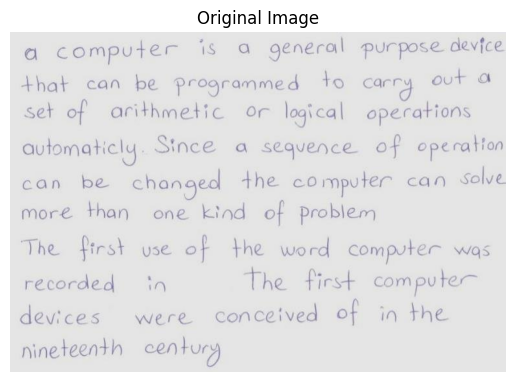


Image with Text Detection Regions:


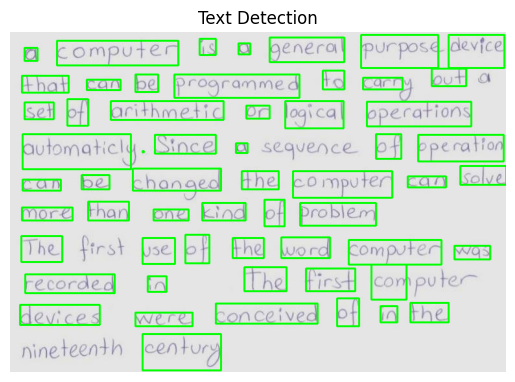


Detected Text:
a computer is a general purpose device +hat can be programmed to. carry out set of arithmetic or logical operations automaticly . Since a of operattan can be chonaed the computer can Solve more than one kind of problem The. use. of the word computer was recorded in The first com devices were conceived of in the century


In [11]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

# Image path
img_path = "D:\VIIT\TY\Sem 5\DL\Assignment_5\image.jpg"

# Load the image
image_loaded = cv2.imread(img_path)

# Check if image was successfully loaded
if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    # Display original image using matplotlib
    print("\nOriginal Image:")
    plt.imshow(cv2.cvtColor(image_loaded, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')
    plt.title("Original Image")
    plt.show()

    # --- Preprocessing Step (Replace with your actual function) ---
    preprocessed_image = process_image(image_loaded)

    # --- Text Region Detection (Replace with your actual function) ---
    text_boxes = text_regions(preprocessed_image)

    # --- Mark Text Regions (Replace with your actual function) ---
    image_with_boxes = mark_text_regions(image_loaded.copy(), text_boxes)

    # Display image with detected text regions
    print("\nImage with Text Detection Regions:")
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Text Detection")
    plt.show()

    # --- Extract Text (Replace with your actual function) ---
    extracted_text = extract_text(text_boxes)
    
    print("\nDetected Text:")
    print(extracted_text)
